In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ploting.utlis as pltu

In [8]:
measures = []
metrics = ['mse', 'mae', 'mape']

for metric in metrics:
    measures.append({
            'metric': metric,
            'set': 'train',
            'column_name': f'train_{metric}'
        })

for metric in metrics:
    measures.append({
            'metric': f'val_{metric}',
            'set': 'val',
            'column_name': f'val_{metric}'
        })
        

In [9]:
import json

activation_functions = ['tanh', 'sigmoid']
dropouts = [0.1, 0.2]

all_history = []
for activation in activation_functions:
    for recurrent_activation in activation_functions:
        for dropout in dropouts:
            for recurrent_dropout in dropouts:
                with open(f'./5_hyperparameters_2_models/model-a={activation}-ra={recurrent_activation}-d={dropout}-rd={recurrent_dropout}/history.json') as history_file:
                    all_history.append({
                        'activation': activation,
                        'recurrent_activation': recurrent_activation,
                        'dropout': dropout,
                        'recurrent_dropout': recurrent_dropout,
                        'history': json.load(history_file)
                    })

In [10]:
all_history_columns_for_df = ['num', 'activation', 'recurrent_activation', 'dropout', 'recurrent_dropout', 'epochs']
metric_columns = []
for measure in measures:
    metric_columns.append(measure['column_name'])
    all_history_columns_for_df.append(measure['column_name'])
for metric in metrics:
    metric_columns.append(f'test_{metric}')
    all_history_columns_for_df.append(f'test_{metric}')

all_history_for_df = []
num = 1
for history in all_history:
    epochs = len(history['history']['train']['loss'])

    item = [
        num,
        history['activation'],
        history['recurrent_activation'],
        history['dropout'],
        history['recurrent_dropout'],
        epochs
    ]
    
    for measure in measures:
        metric_value = history['history']['train'][measure['metric']][-1]
        item.append(metric_value)
    
    for index, metric in enumerate(metrics):
        metric_value = history['history']['test'][index]
        item.append(metric_value)

    all_history_for_df.append(item)
    num += 1

all_history_df = pd.DataFrame(all_history_for_df, columns=all_history_columns_for_df)
all_history_df

,num,activation,recurrent_activation,dropout,recurrent_dropout,epochs,train_mse,train_mae,train_mape,val_mse,val_mae,val_mape,test_mse,test_mae,test_mape
0,1,tanh,tanh,0.1,0.1,27,2086.996338,31.104765,211.206909,2323.176270,30.614971,244.384476,2907.656006,35.434399,283.498444
1,2,tanh,tanh,0.1,0.2,53,1901.624512,29.747650,190.935318,2311.484863,30.602541,199.977768,2749.080078,34.357944,290.042053
2,3,tanh,tanh,0.2,0.1,29,1958.679443,30.199602,197.026276,2363.435303,30.590162,215.119293,2745.054932,35.801857,311.200867
3,4,tanh,tanh,0.2,0.2,29,2009.846924,30.771620,193.228302,2136.624023,29.617943,202.506805,2997.456299,36.567192,289.347382
4,5,tanh,sigmoid,0.1,0.1,25,1929.670288,29.206667,175.984741,2196.109131,30.185953,200.452011,2733.870117,34.134167,267.647888
5,6,tanh,sigmoid,0.1,0.2,24,1979.641479,29.654259,179.829254,2195.958740,29.344152,194.490555,2748.734375,34.868916,289.826355
6,7,tanh,sigmoid,0.2,0.1,35,1807.718506,28.126350,166.198181,2062.046143,28.400206,192.224152,2697.425537,34.800728,253.748657
7,8,tanh,sigmoid,0.2,0.2,40,1728.375732,27.317011,158.858398,2335.249512,30.139561,253.654770,2672.878906,34.326557,291.375702
8,9,sigmoid,tanh,0.1,0.1,26,1969.582520,29.395861,175.920639,2199.035889,29.869595,231.344757,2909.382324,34.889542,238.929489
9,10,sigmoid,tanh,0.1,0.2,60,1708.073975,27.184118,166.067764,2156.631592,29.270561,213.035828,2999.518555,33.833775,195.537430


In [11]:
metrics_lims = {
    'mse': 3200,
    'mae': 38,
    'mape': 100,
}
set_names = {
    'train': 'training',
    'val': 'validation',
    'test': 'test'
}
metrics_y_labels = {
    'mse': 'Mean Squared Error',
    'mae': 'Mean Absolute Error',
    'mape': 'Mean Absolute Percentage Error'
}
metrics_title = {
    'mse': 'mean squared error',
    'mae': 'mean absolute error',
    'mape': 'mean absolute percentage error'
}
title_sets_names = {
    'train': 'training',
    'val': 'validation',
    'test': 'test',
}
metrics_y_lims = {
    'mse': (1900, 3800),
    'mae': (28, 42),
    'mape': (0, 100)
}

def draw_barh(measure: str):
    sorted = all_history_df[['num', measure]].sort_values(measure, ascending=False)

    set, metric = measure.split('_')[:3]

    plt.figure(figsize=(10,8))
    plt.barh(range(len(sorted['num'])), sorted[measure])
    plt.yticks(range(len(sorted['num'])), [num for num in sorted['num']], fontsize=14)
    plt.ylabel('Model number', fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel(metrics_y_labels[metric], fontsize=14)
    plt.title(f'Comparison of {metrics_title[metric]} values\nfor models obtained for the {set_names[set]} set', fontsize=14, fontweight='bold')
    plt.xlim((0, metrics_lims[metric] * 1.1))

    for i, v in enumerate(sorted[measure]):
        text = str(round(v, 2)).replace('.', ',')
        plt.annotate(f'{text}', (v, i), textcoords="offset points", va='center', fontsize=14, xytext=(5,0))

    plt.show()

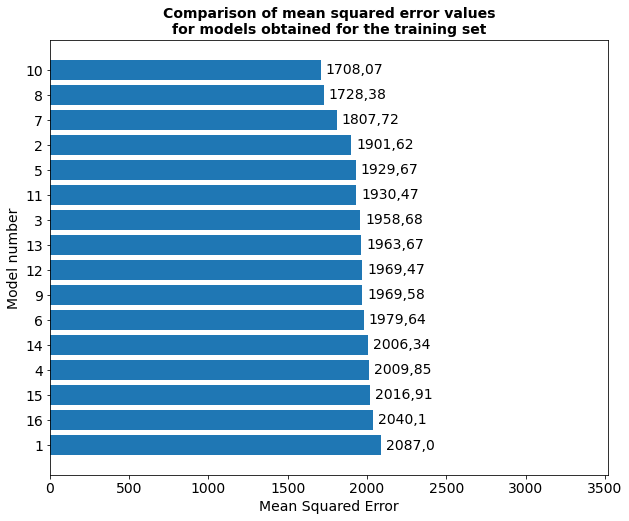

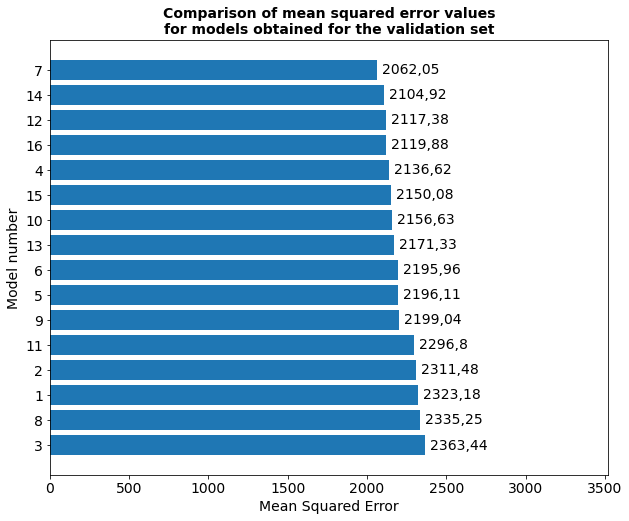

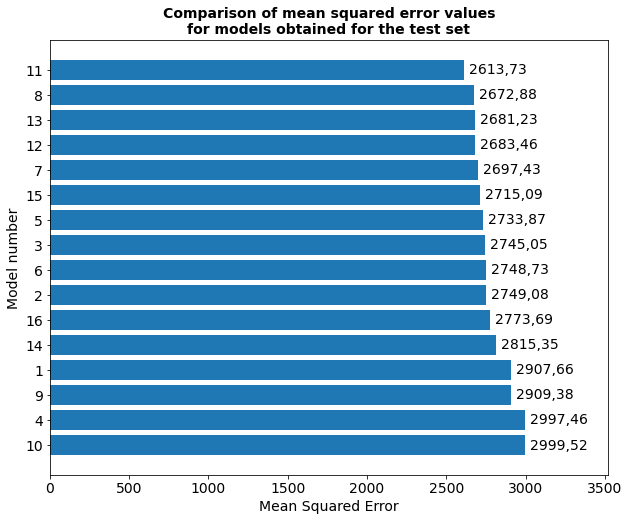

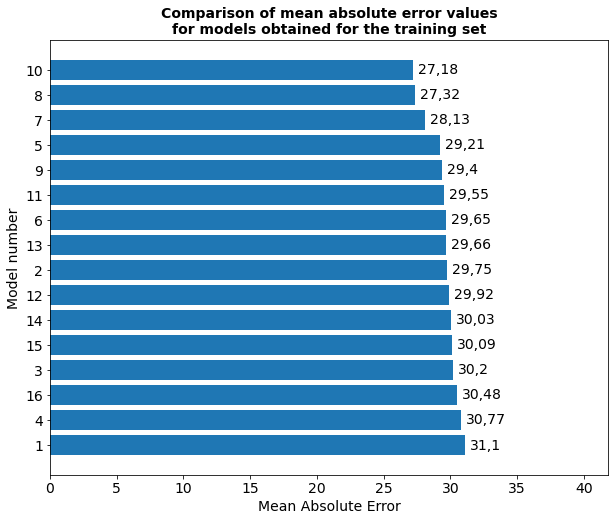

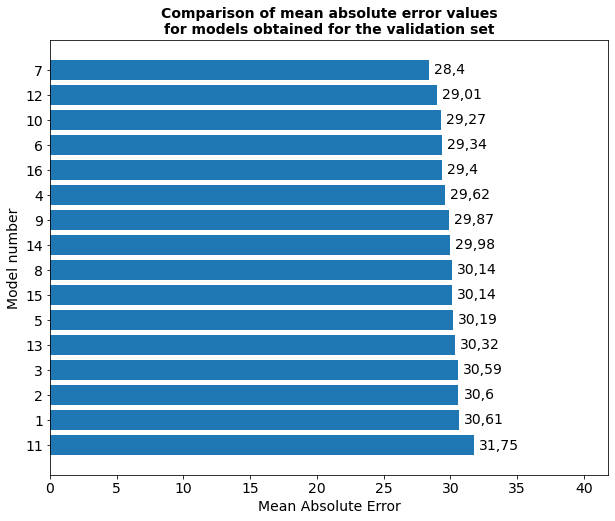

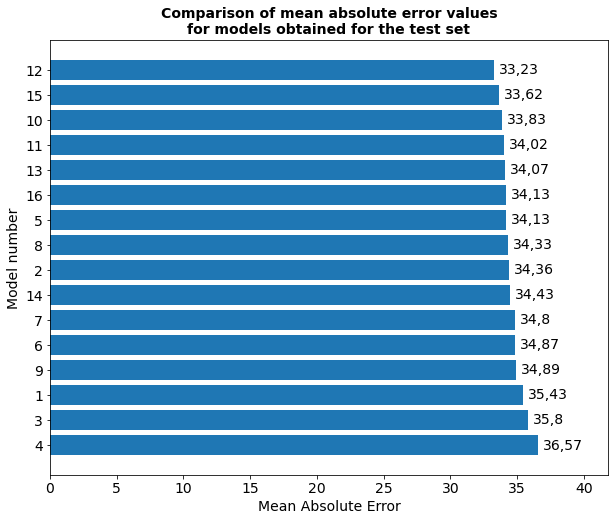

In [12]:
for metric in ['mse', 'mae']:
    for set in ['train', 'val', 'test']:
        draw_barh(f'{set}_{metric}')